# Implementação de árvores Rubro-Negras (Red-Black Trees) em Python

## Pré-Requisitos

### Instalação de Bibliotecas

In [ ]:
pip install matplotlib networkx

### Importação de bibliotecas e nome de variáveis

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

RED = 'RED'
BLACK = 'BLACK'

## Algorítmos

In [ ]:
"""
TODO @CauaMaia: Ler sobre Árvore Rubro-Negra, ler o Algorítmo e me apresentar depois.
TODO @AntonioAzeved0: Ler sobre Árvore Rubro-Negra, ler o Algorítmo e me apresentar depois.
"""

class Node:
    """
    Representa um nó (vermelho ou preto) em uma Árvore Rubro-Negra.
    """
    def __init__(self, key, color=RED, left=None, right=None, parent=None):
        self.key = key          # Chave do nó
        self.color = color      # Cor do nó
        self.left = left        # Filho esquerdo
        self.right = right      # Filho direito
        self.parent = parent    # Nó pai

class RedBlackTree:
    """
    Implementa uma Árvore Rubro-Negra (RBT), que é uma árvore binária de busca auto-balanceada.
    """
    def __init__(self):
        """
        Inicializa uma Árvore Rubro-Negra vazia com um nó NIL (sentinela).
        """
        self.NIL = Node(key=None, color=BLACK)
        self.root = self.NIL

    def left_rotate(self, x):
        """
        Realiza uma rotação à esquerda na subárvore enraizada no nó x.
        Args:
            x: O nó onde a rotação será aplicada.
        """
        y = x.right
        x.right = y.left
        if y.left != self.NIL:
            y.left.parent = x
        y.parent = x.parent
        if x.parent == self.NIL:
            self.root = y  # x era a raiz
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        y.left = x
        x.parent = y

    def right_rotate(self, y):
        """
        Realiza uma rotação à direita na subárvore enraizada no nó y.
        Args:
            y: O nó onde a rotação será aplicada.
        """
        x = y.left
        y.left = x.right
        if x.right != self.NIL:
            x.right.parent = y
        x.parent = y.parent
        if y.parent == self.NIL:
            self.root = x  # y era a raiz
        elif y == y.parent.left:
            y.parent.left = x
        else:
            y.parent.right = x
        x.right = y
        y.parent = x

    def insert(self, key):
        """
        Insere um novo nó com a chave fornecida na Árvore Rubro-Negra.
        Args:
            key: A chave do novo nó a ser inserido.
        """
        node = Node(key)
        node.left = self.NIL
        node.right = self.NIL

        y = None
        x = self.root

        # Encontra o local correto para inserir o novo nó
        while x != self.NIL:
            y = x
            if node.key < x.key:
                x = x.left
            else:
                x = x.right

        node.parent = y

        if y == None:
            self.root = node  # A árvore estava vazia
        elif node.key < y.key:
            y.left = node
        else:
            y.right = node

        node.color = RED  # Novo nó sempre é vermelho
        self.insert_fixup(node)

    def insert_fixup(self, z):
        """
        Corrige as propriedades da Árvore Rubro-Negra após a inserção de um novo nó.
        Args:
            z: O nó recém-inserido.
        """
        while z.parent != None and z.parent.color == RED:
            if z.parent == z.parent.parent.left:
                y = z.parent.parent.right  # Tio de z
                if y.color == RED:
                    # Caso 1: Tio é vermelho
                    z.parent.color = BLACK
                    y.color = BLACK
                    z.parent.parent.color = RED
                    z = z.parent.parent  # Sobe na árvore
                else:
                    if z == z.parent.right:
                        # Caso 2: z é filho direito
                        z = z.parent
                        self.left_rotate(z)
                    # Caso 3: z é filho esquerdo
                    z.parent.color = BLACK
                    z.parent.parent.color = RED
                    self.right_rotate(z.parent.parent)
            else:
                y = z.parent.parent.left  # Tio de z
                if y.color == RED:
                    # Espelhamento do caso 1
                    z.parent.color = BLACK
                    y.color = BLACK
                    z.parent.parent.color = RED
                    z = z.parent.parent
                else:
                    if z == z.parent.left:
                        # Espelhamento do caso 2
                        z = z.parent
                        self.right_rotate(z)
                    # Espelhamento do caso 3
                    z.parent.color = BLACK
                    z.parent.parent.color = RED
                    self.left_rotate(z.parent.parent)
        self.root.color = BLACK  # Garante que a raiz seja sempre preta

    def transplant(self, u, v):
        """
        Substitui a subárvore enraizada no nó u pela subárvore enraizada no nó v.
        Args:
            u: O nó a ser substituído.
            v: O nó que irá substituí-lo.
        """
        if u.parent == None:
            self.root = v
        elif u == u.parent.left:
            u.parent.left = v
        else:
            u.parent.right = v
        v.parent = u.parent

    def minimum(self, node):
        """
        Encontra o nó com a chave mínima na subárvore a partir do nó dado.
        Args:
            node: O nó raiz da subárvore.
        Returns:
            O nó com a menor chave.
        """
        while node.left != self.NIL:
            node = node.left
        return node

    def delete(self, key):
        """
        Exclui o nó com a chave fornecida da Árvore Rubro-Negra.
        Args:
            key: A chave do nó a ser excluído.
        """
        z = self.search(self.root, key)
        if z == self.NIL:
            print(f"Chave {key} não encontrada")
            return

        y = z
        y_original_color = y.color

        if z.left == self.NIL:
            x = z.right
            self.transplant(z, z.right)
        elif z.right == self.NIL:
            x = z.left
            self.transplant(z, z.left)
        else:
            y = self.minimum(z.right)
            y_original_color = y.color
            x = y.right
            if y.parent == z:
                x.parent = y
            else:
                self.transplant(y, y.right)
                y.right = z.right
                y.right.parent = y

            self.transplant(z, y)
            y.left = z.left
            y.left.parent = y
            y.color = z.color

        if y_original_color == BLACK:
            self.delete_fixup(x)

    def delete_fixup(self, x):
        """
        Corrige as propriedades da Árvore Rubro-Negra após a exclusão de um nó.
        Args:
            x: O nó a partir do qual iniciar a correção.
        """
        while x != self.root and x.color == BLACK:
            if x == x.parent.left:
                w = x.parent.right  # Irmão de x
                if w.color == RED:
                    # Caso 1: Irmão é vermelho
                    w.color = BLACK
                    x.parent.color = RED
                    self.left_rotate(x.parent)
                    w = x.parent.right
                if w.left.color == BLACK and w.right.color == BLACK:
                    # Caso 2: Ambos os filhos de w são pretos
                    w.color = RED
                    x = x.parent
                else:
                    if w.right.color == BLACK:
                        # Caso 3: Filho direito de w é preto
                        w.left.color = BLACK
                        w.color = RED
                        self.right_rotate(w)
                        w = x.parent.right
                    # Caso 4: Filho direito de w é vermelho
                    w.color = x.parent.color
                    x.parent.color = BLACK
                    w.right.color = BLACK
                    self.left_rotate(x.parent)
                    x = self.root
            else:
                w = x.parent.left  # Irmão de x
                if w.color == RED:
                    # Espelhamento do caso 1
                    w.color = BLACK
                    x.parent.color = RED
                    self.right_rotate(x.parent)
                    w = x.parent.left
                if w.right.color == BLACK and w.left.color == BLACK:
                    # Espelhamento do caso 2
                    w.color = RED
                    x = x.parent
                else:
                    if w.left.color == BLACK:
                        # Espelhamento do caso 3
                        w.right.color = BLACK
                        w.color = RED
                        self.left_rotate(w)
                        w = x.parent.left
                    # Espelhamento do caso 4
                    w.color = x.parent.color
                    x.parent.color = BLACK
                    w.left.color = BLACK
                    self.right_rotate(x.parent)
                    x = self.root
        x.color = BLACK

    def search(self, node, key):
        """
        Procura um nó com a chave fornecida na subárvore a partir do nó dado.
        Args:
            node: O nó raiz da subárvore.
            key: A chave a ser procurada.
        Returns:
            O nó com a chave fornecida, ou NIL se não encontrado.
        """
        if node == self.NIL or key == node.key:
            return node
        if key < node.key:
            return self.search(node.left, key)
        else:
            return self.search(node.right, key)

    def inorder_helper(self, node, res):
        """
        Função auxiliar para a travessia inorder.
        Args:
            node: O nó atual.
            res: Lista onde os valores serão adicionados.
        """
        if node != self.NIL:
            self.inorder_helper(node.left, res)
            res.append(node.key)
            self.inorder_helper(node.right, res)

    def inorder(self):
        """
        Realiza uma travessia inorder da árvore.
        Returns:
            Uma lista de chaves em ordem crescente.
        """
        res = []
        self.inorder_helper(self.root, res)
        return res

    def visualize(self):
        """
        Visualiza a Árvore Rubro-Negra usando NetworkX e Matplotlib.
        """
        G = nx.DiGraph()
        labels = {}
        self._add_edges(self.root, G, labels)
        pos = nx.nx_pydot.graphviz_layout(G, prog='dot')
        node_colors = [node[1]['color'] for node in G.nodes(data=True)]

        nx.draw(G, pos, with_labels=False, node_color=node_colors)

        ax = plt.gca()
        for node in G.nodes(data=True):
            x, y = pos[node[0]]
            node_label = labels[node[0]]
            node_color = node[1]['color']
            # Define a cor da fonte com base na cor do nó
            font_color = 'white' if node_color == 'black' else 'black'
            ax.text(x, y, node_label, ha='center', va='center', color=font_color, fontsize=10)
        plt.show()

    def _add_edges(self, node, G, labels):
        """
        Função auxiliar para adicionar nós e arestas ao gráfico.
        Args:
            node: O nó atual.
            G: O gráfico NetworkX.
            labels: Dicionário para armazenar os rótulos dos nós.
        """
        if node != self.NIL:
            G.add_node(id(node), color='red' if node.color == RED else 'black')
            labels[id(node)] = str(node.key)
            if node.left != self.NIL:
                G.add_edge(id(node), id(node.left))
                self._add_edges(node.left, G, labels)
            if node.right != self.NIL:
                G.add_edge(id(node), id(node.right))
                self._add_edges(node.right, G, labels)

## Testes

Travessia em ordem:
[4, 6, 8, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 30, 33, 35]


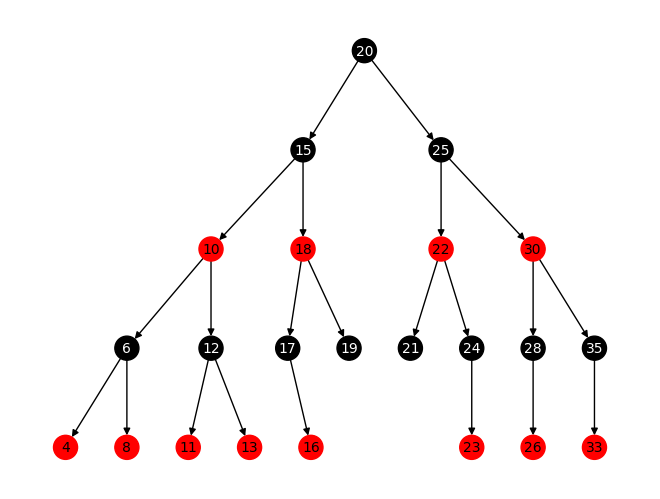

Travessia em ordem após deletar nós:
[4, 6, 8, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 28, 33, 35]


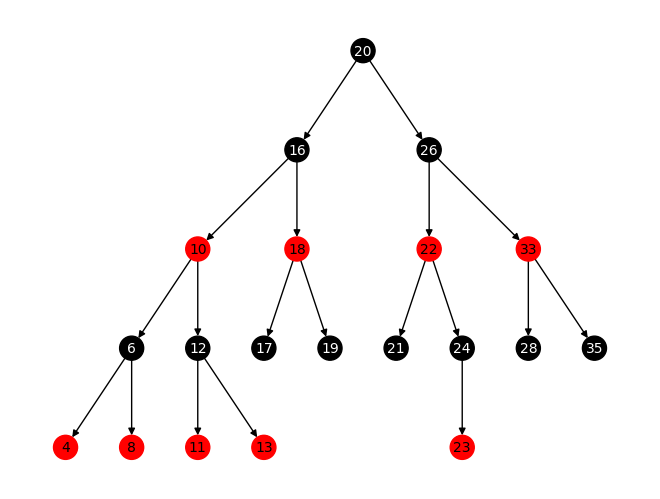

In [9]:
tree = RedBlackTree()
values = [20, 15, 25, 10, 18, 22, 30, 6, 12, 17, 19, 21, 24, 28, 35, 4, 8, 11, 13, 16, 23, 26, 33]
for val in values:
    tree.insert(val)

print("Travessia em ordem:")
print(tree.inorder())

tree.visualize()

tree.delete(15)
tree.delete(25)
tree.delete(30)

print("Travessia em ordem após deletar nós:")
print(tree.inorder())

tree.visualize()
